In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# loading the preprocessed dataset
file_path = "../data/preprocessed_breast_cancer_data.csv"
data = pd.read_csv(file_path)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      2509 non-null   object 
 1   age_at_diagnosis                2509 non-null   float64
 2   type_of_breast_surgery          2509 non-null   object 
 3   cancer_type                     2509 non-null   object 
 4   cancer_type_detailed            2509 non-null   object 
 5   cellularity                     2509 non-null   object 
 6   chemotherapy                    2509 non-null   int64  
 7   pam50_+_claudin-low_subtype     2509 non-null   object 
 8   cohort                          2509 non-null   float64
 9   er_status_measured_by_ihc       2509 non-null   object 
 10  er_status                       2509 non-null   int64  
 11  neoplasm_histologic_grade       2509 non-null   float64
 12  her2_status_measured_by_snp6    25

In [17]:
# select relevant features
features = ["age_at_diagnosis", "tumor_size", "tumor_stage", "chemotherapy", "hormone_therapy",
           "her2_status", "pr_status", "er_status", "mutation_count", "nottingham_prognostic_index"]

data_clustering = data[features].copy()

In [18]:
# Standardize features before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

In [19]:
# Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

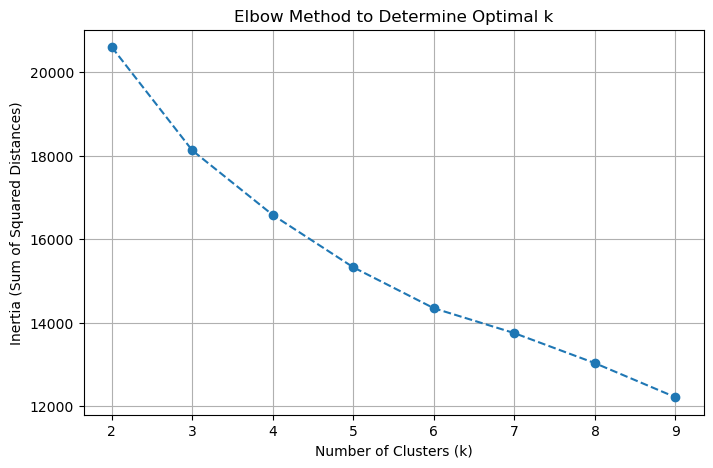

In [20]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid()
plt.show()

**Optimal Value of k:**
Based on the **Elbow Method, k=5**

In [21]:
# Apply K-Means with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_clustering['Cluster'] = kmeans.fit_predict(data_scaled)

In [22]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['Cluster'] = data_clustering['Cluster']

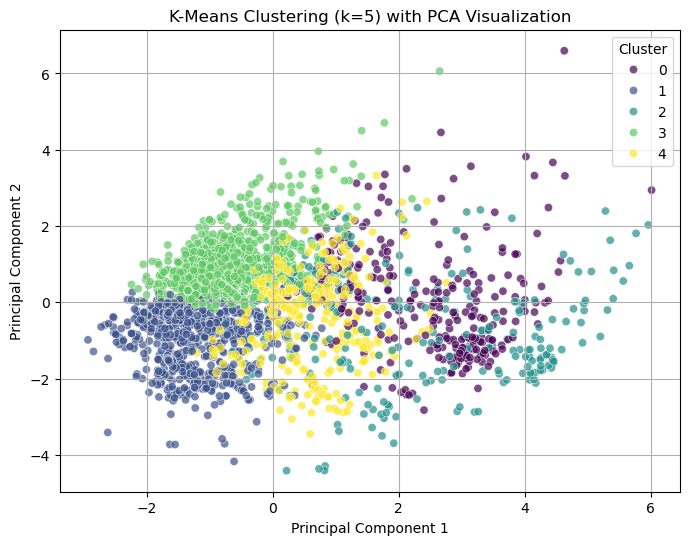

In [23]:
# Plot PCA visualization of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca['PC1'], 
                y=data_pca['PC2'], 
                hue=data_pca['Cluster'], 
                palette='viridis', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering (k={optimal_k}) with PCA Visualization")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [24]:
# Analyze cluster characteristics by calculating the mean values for each feature per cluster
cluster_summary = data_clustering.groupby('Cluster').mean()

In [25]:
# Display the cluster summary
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
         age_at_diagnosis  tumor_size  tumor_stage  chemotherapy  \
Cluster                                                            
0               50.859934   32.281967     2.108197      0.996721   
1               59.774154   19.124502     1.232628      0.003021   
2               56.893862   27.825691     1.890244      0.418699   
3               65.640598   28.140186     2.074227      0.003093   
4               57.284877   25.189877     1.748466      0.000000   

         hormone_therapy  her2_status  pr_status  er_status  mutation_count  \
Cluster                                                                       
0               0.504918     0.000000   0.301639   0.432787        5.026230   
1               0.460725     0.001511   0.790030   0.992447        6.027190   
2               0.483740     1.000000   0.207317   0.434959        5.731707   
3               0.972165     0.000000   0.751546   0.998969        5.306186   
4               0.687117

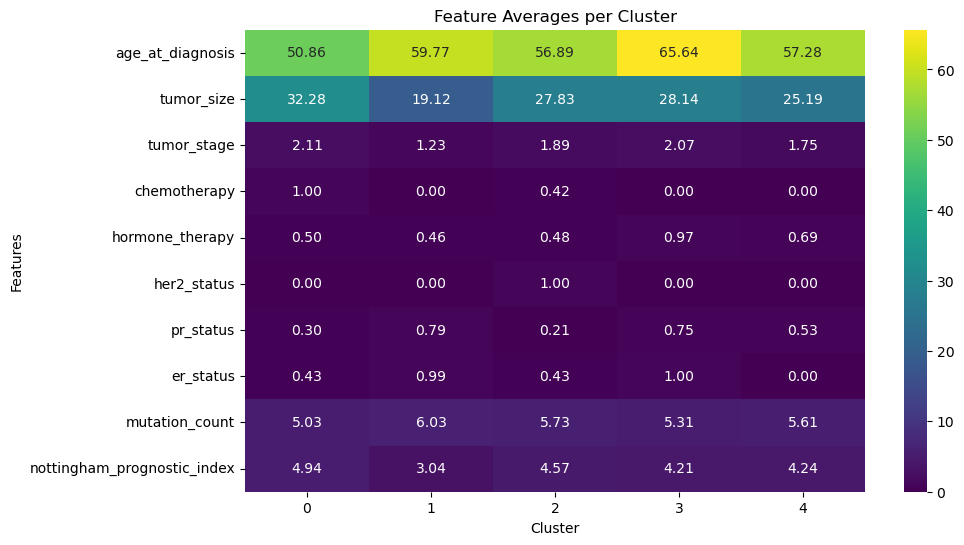

In [26]:
# Plot cluster characteristics using heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, cmap="viridis", annot=True, fmt=".2f")
plt.title("Feature Averages per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

### Key Findings from Clustering Analysis

1. **Identified 5 Distinct Clusters of Patients**:
    - Patients grouped by **age, tumor size, tumor stage, hormone therapy, chemotherapy, HER2/PR/ER status, and mutation count**.
    - Each cluster showed distinct characteristics in terms of treatment received and prognosis indicators.
    
2. **Cluster Characteristics Suggest Different Risk Profiles**:
    - **Cluster 0**: Youngest patients, largest tumors, high chemotherapy rates → likely **more aggressive cases**.
    - **Cluster 1**: Older patients, smallest tumors, lowest tumor stage → likely **better prognosis**.
    - **Cluster 2**: HER2+ group, moderate tumor stage and treatment variation.
    - **Cluster 3**: Oldest group, moderate tumor size, high hormone therapy use → **hormone-driven cancer subtype**.
    - **Cluster 4**: Mixed-age group, moderate tumor size, lower HER2+ rates.
    
3. **Clustering Provides Insight into Potential Treatment Strategies**:
    - Certain clusters have a higher percentage of chemotherapy usage, while others rely more on hormone therapy.
    - This could help in tailoring treatment strategies based on genetic markers and tumor characteristics.

### Final Conclusion: Can We Find Hidden Subgroups of Patients Based on Genetic and Clinical Features? 
Yes, clustering reveals meaningful patient subgroups that could help personalize cancer treatment and prognosis assessment.